In [ ]:
import networkx as nx
import cenpy
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily

In [ ]:
ct_NewH = ['New Haven County, Connecticut, USA']
ct_Mids = ['Middlesex County, Connecticut, USA']
ct_Tola = ['Tolland County, Connecticut, USA']
ct_Hart = ['Hartford County, Connecticut, USA']
ct_Fair = ['Fairfield County, Connecticut, USA']
          #{'city':'Los Altos Hills', 'state':'California'},
          #'Loyola, California']
        
desired_building_types = ['school', 'commercial', 'retail','office','garage','hotel','church','train_station','dormitory',
                          'mosque','warehouse','stadium','clubhouse','chapel','fire_station','university','kindergarten',
                         'service','construction','hospital','plant_nursery','greenhouse','public','government','farm_auxiliary',
                         'farm','boathouse','sports_centre','dome','hangar','kiosk','college','napa auto parts','cathedral',
                         'synagogue','library','museum','convent','store','yes;commercial','university;yes','supermarket','parish_hall',
                          'motel','roof;commercial']

In [10]:
graph_NewH = ox.graph_from_place(ct_NewH, network_type='all')
area_NewH = ox.geocode_to_gdf(ct_NewH)
bldgs_NewH = ox.geometries_from_place(ct_NewH, tags={'building': desired_building_types})
area = ox.geocode_to_gdf(ct_NewH)
unique_building_types_NewH = bldgs_NewH['building'].unique()

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17572\3320421492.py:3: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs_NewH = ox.geometries_from_place(ct_NewH, tags={'building': desired_building_types})


In [11]:

building_type_counts = bldgs_NewH['building'].value_counts()

# Print the counts for each building type
for building_type, count in building_type_counts.items():
    print(f"{building_type}: {count} buildings")

commercial: 507 buildings
garage: 358 buildings
university: 313 buildings
retail: 223 buildings
school: 207 buildings
church: 130 buildings
greenhouse: 125 buildings
service: 27 buildings
office: 23 buildings
farm_auxiliary: 17 buildings
dormitory: 15 buildings
hospital: 13 buildings
train_station: 13 buildings
hangar: 12 buildings
stadium: 11 buildings
warehouse: 10 buildings
hotel: 10 buildings
public: 9 buildings
college: 7 buildings
government: 6 buildings
kindergarten: 5 buildings
motel: 5 buildings
chapel: 3 buildings
library: 2 buildings
farm: 2 buildings
synagogue: 2 buildings
construction: 2 buildings
parish_hall: 1 buildings
sports_centre: 1 buildings
supermarket: 1 buildings
yes;commercial: 1 buildings
university;yes: 1 buildings


(-73.36682428, -72.49637711999999, 41.145569640000005, 41.668081959999995)

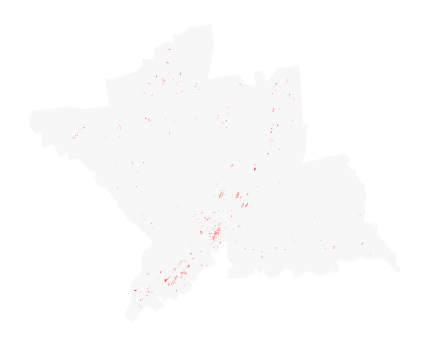

In [12]:
#BLDGS
fig, ax = plt.subplots(figsize=(5,5))
area.plot(ax=ax, facecolor='0.9',alpha=.3)#, edgecolor='k')
bldgs_NewH_no_nodes = bldgs_NewH.iloc[bldgs_NewH.index.get_level_values('element_type')!='node']['geometry']
bldgs_NewH_no_nodes.plot(ax=ax, facecolor='red', alpha=1)
plt.tight_layout()
ax.axis('off')
#plt.savefig('../figures/pv-buildings.png',dpi=120)

In [13]:
# Convert the building_geometries GeoDataFrame to a GeoSeries of geometries
building_geometries_series = gpd.GeoSeries(bldgs_NewH.geometry)

# Calculate the total building footprint area
total_footprint_area = building_geometries_series.area.sum()

# Print the total building footprint area
print("Total Building Footprint Area:", total_footprint_area)

#from the crs from this website: https://epsg.io/6433
#According to the EPSG registry, 'EPSG:6433' corresponds to NAD83 / New York Long Island (ftUS). 
#The unit of measure for this CRS is feet (US survey feet).
projected_crs = 'EPSG:6433'

# Reproject the building geometries to the projected CRS
building_geometries_projected = bldgs_NewH.to_crs(projected_crs)

# Calculate the total building footprint area in the projected CRS
total_footprint_area_projected = building_geometries_projected.area.sum()

# Print the total building footprint area in the projected CRS
print("Total Building Footprint Area (Projected):", total_footprint_area_projected) #square feet

Total Building Footprint Area: 0.00043244495621992034
Total Building Footprint Area (Projected): 4018927.730000489


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17572\1027286707.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  total_footprint_area = building_geometries_series.area.sum()
